# Lab 1: Introduction to Numpy
Machine Learning 2019/2020 <br>
Gosia Migut and Ruben Wiersma

**WHAT** This nonmandatory lab consists of several programming and insight exercises/questions. 

**WHY** The exercises are meant to prepare you for using Python and Numpy in this course. 

**HOW** Follow the exercises in this notebook either on your own or with a friend. Use [Mattermost][1] to disscus questions with your peers. For additional questions and feedback please consult the TA's during the lab session. 

[1]: https://mattermost.ewi.tudelft.nl/signup_user_complete/?id=ccffzw3cdjrkxkksq79qbxww7a

We advise you to follow this notebook and use it as a reference for later. __Make sure that you have followed the Python tutorial (intro-python).__ If, after walking through these tutorials, you still feel uncomfortable with Python, we recommend the following tutorials:
* [The Python Tutorial] 
* [Python Numpy Tutorial]


[Python Numpy Tutorial]: http://cs231n.github.io/python-numpy-tutorial/

[The Python Tutorial]: https://docs.python.org/3/tutorial/index.html

This tutorial consists of two steps: first, you will get familiarized with the basic operations on arrays in NumPy, after which you get to practice with a number of exercises. If you want more in-depth understanding of NumPy, we highly recommend [Stanfords NumPy tutorial]!

[Stanfords NumPy tutorial]: http://cs231n.github.io/python-numpy-tutorial/

## Step 1: Array programming with NumPy

In this step we will show you the basics of array manipulation in NumPy.

We strongly advise you to reference and read the manuals and tutorials on the web to make sure you learn how to use modern array manipulation to unleash its true power.

In machine learning we are dealing with massive amounts of data. This data is most often organised in tables. When all data elements in a table are of the same datatype (like an integer or a floating point number) the table can be represented with a homogeneous array.

Languages that are optimally suited for programming with data are therefore equipped with array data types as an integral part of the language. In other words: NumPy and other data libraries are built around their array data type (NumPy: ndarray, Pandas: DataFrame).

Let's first import the NumPy library.

In [3]:
import numpy as np

### Declaring a regular Python list

In [1]:
list1 = [1, 2, 3, 4]
type(list1)

list

### Making a numpy array using Python lists

In [4]:
array1 = np.array(list1)
array1

array([1, 2, 3, 4])

In [5]:
type(array1)

numpy.ndarray

In [6]:
print(array1)

[1 2 3 4]


### We can also use more dimensions

In [7]:
# Declare an extra list.
list2 = [11, 22, 33, 44]
# Combine the lists into a 2D list.
lists = [list1, list2]
lists

[[1, 2, 3, 4], [11, 22, 33, 44]]

In [20]:
array2 = np.array(lists)
array2
# print(array2.shape)

array([[ 1,  2,  3,  4],
       [11, 22, 33, 44]])

### And print their shapes
We would obviously expect a (4,1) and a (4,2)... or don't we?

In [11]:
print("Arr1: ", array1.shape)
print("Arr2: ", array2.shape)

Arr1:  (4,)
Arr2:  (2, 4)


The best way to think about NumPy arrays is that they consist of two parts, a _data buffer_ which is just a block of raw elements, and a _view_ which describes how to interpret the data buffer.

Here the shape (4,) means the array is indexed by a single index which runs from 0 to 4. 
In most situations the lack of second dimension is not a problem. If it does turn into a problem (e.g. when you are trying to take a transpose of this vector) you can just call the `reshape` function on the array to generate a new view:

In [16]:
# Do note the double brackets, as the size is added as a tuple: (rows, columns)
arr = array1.reshape(4, 1)
arr[0] = 5
print(arr)
print(arr.shape)
array1 = array1.reshape((4,1))
array1[0] = 5
print(array1)
array1.shape

[[5]
 [2]
 [3]
 [4]]
(4, 1)
[[5]
 [2]
 [3]
 [4]]


(4, 1)

For the above examples, we happen to know what we stored in our array, but in some cases we are not aware. To find out, you can call `dtype`:


In [17]:
array2.dtype

dtype('int32')

### Initializing regularly used arrays
There are also ways to initialize a types of arrays that are used regularly, such as:

In [19]:
# The empty array
print("Ex1: ", np.empty(5))

# Array of 5 floating point zeros
print("Ex2: ", np.zeros(5))

# Array of 5 floating point ones
print("Ex3: ", np.ones(5))

# Array of 5 integer incrementing numbers
print("Ex4: ", np.arange(5))

# Start at 5, stop at 20, do it in steps of 2
print("Ex5: ", np.arange(5, 20, 2))

# Making the identity matrix (ones on the diagonal)
print("Ex6: ")
print(np.eye(5))

Ex1:  [1. 1. 1. 1. 1.]
Ex2:  [0. 0. 0. 0. 0.]
Ex3:  [1. 1. 1. 1. 1.]
Ex4:  [0 1 2 3 4]
Ex5:  [ 5  7  9 11 13 15 17 19]
Ex6: 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### Mathematical operations


You can apply basic mathematical operations to arrays. These are applied element-wise, which means that the operation is performed on each individual element in the array. Linear Algebra operations, like matrix multiplication or dot product are performed with special NumPy functions, like `np.matmul` or `np.dot`.

In [21]:
array3 = np.array([[1, 2, 3, 4], [8, 9, 10, 11]])
array3

array([[ 1,  2,  3,  4],
       [ 8,  9, 10, 11]])

In [22]:
# Element-wise multiplication
array3 * array3

array([[  1,   4,   9,  16],
       [ 64,  81, 100, 121]])

In [23]:
# Element-wise subtraction
array3 - 5

array([[-4, -3, -2, -1],
       [ 3,  4,  5,  6]])

In [24]:
1 / array3

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.125     , 0.11111111, 0.1       , 0.09090909]])

In [25]:
array3 ** 3

array([[   1,    8,   27,   64],
       [ 512,  729, 1000, 1331]], dtype=int32)

### You can also apply functions to all elements in an array at once

The nice thing about Numpy arrays is that it allows you to manipulate the data in arrays without writing explicit loops. For instance look at the addition of all elements in an array:

In [27]:
a = np.random.rand(65536)
print(a)

[0.91266375 0.40215249 0.19861292 ... 0.43180878 0.12169742 0.85924665]


In [28]:
#calculate the sum of the elements in array
def loopsum(a):
    sum = 0
    for i in range(len(a)):
        sum += a[i]
    return sum

In [30]:
%timeit loopsum(a)
%timeit np.sum(a)

11 ms ± 98.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
33.2 µs ± 537 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


So the explicit loop sum function in python takes 10 ms versus 30 µs for the numpy version. That is about 350 times slower for the explicit loop version.
So be aware in this course to use built-in NumPy tools to manipulate and calculate with arrays.
Some built-in functions of NumPy can be found [here].



[here]: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations



### Indexing Arrays

In [31]:
array4 = np.arange(0, 10)
array4

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

There is a minor difference when it comes to indexing, compared to Python lists, namely that a NumPy array allows two different indexing methods:

In [32]:
list3 = [[1, 2, 3], [4, 5, 6]]
array5 = np.array(list3)

# Watch the brackets closely.
print("List: ", list3[1][2])
# Array can use two different approaches
print("Array ", array5[1, 2])
print("Array ", array5[1][2])

List:  6
Array  6
Array  6


### Slicing arrays
Sometimes you do not want the full array, but just parts of it, we can use array slicing for this

In [33]:
# Show original array
print(array4)
# We want to 2nd to 5th element:
print(array5[0:1,0:1])
# We can also use it to set the value of multiple entries:
array4[2:5] = 13
print(array4)

[0 1 2 3 4 5 6 7 8 9]
[[1]]
[ 0  1 13 13 13  5  6  7  8  9]


One important thing to note is that a slice is just another _view_ of the underlying data buffer. If you change data in the slice, you are actually changing the data in the underlying data buffer and thus in the orginal array. This is advantageous for the memory efficiency of your program, but sometimes it can cause errors when overlooked.

In [34]:
array4 = np.arange(0, 10)
# Take a slice, consiting of the 2nd to 6th element.
slice_array4 = array4[2:6]
# We iterate over all values, setting them to 22
slice_array4[:] = 22
print(slice_array4)
print(array4)

[22 22 22 22]
[ 0  1 22 22 22 22  6  7  8  9]


To prevent this, we can also make a new copy, to not just generate a view, but to actually reserve new memory for the object we are making:

In [35]:
array4 = np.arange(0, 10)
array5 = array4.copy()
print(array4)
print(array5)
array5[:] = 22
print("So did we make a copy?")
print(array4)
print(array5)
print("Seems we did.")

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
So did we make a copy?
[0 1 2 3 4 5 6 7 8 9]
[22 22 22 22 22 22 22 22 22 22]
Seems we did.


#### 2D array slicing

In [ ]:
array6 = np.array([[2, 4, 6], [8, 10, 12], [14, 16, 18]])
print(array6)
# let's say you only want just the upper right square of 2x2 of the above matrix
array6[:2, 1:]

#### Fancy Indexing
Sometimes you don't want to have every row, but perhaps skip a few entries. This is easily possible in python. Let us assume we only want the 2nd, 3rd, 5th, and 7th row in the following example.

In [39]:
# Below we use a list comprehension (which you should have seen in Introduction to Programming as well)
# To generate an array with 10 rows, and each column goes from 0 to 10.
array7 = np.array([[j for i in range(10)] for j in range(10)])
print(array7)
arr1 = np.array([i for i in range(10)])
print(arr1)
# As we start at index 0, we actually want the following rows [1, 2, 4, 6].
# Also note the double brackets below.
print(array7[[1, 2],:5])
print(array7[:,[2,4]])

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]
[0 1 2 3 4 5 6 7 8 9]
[[1 1 1 1 1]
 [2 2 2 2 2]]
[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]]


You can do the above in any order you wish.

In [ ]:
array7[[7, 3, 5, 2]]

### Array Transposition

In [ ]:
array8 = np.arange(40).reshape((8, 5))
array8

In [ ]:
# If you want to transpose a matrix you can go two ways:
print(np.transpose(array8))
# And
print(array8.T)

### Array Processing

In [41]:
# Range from -5 to 5
points = np.arange(-5, 5, 0.01)
print(points)

[-5.0000000e+00 -4.9900000e+00 -4.9800000e+00 -4.9700000e+00
 -4.9600000e+00 -4.9500000e+00 -4.9400000e+00 -4.9300000e+00
 -4.9200000e+00 -4.9100000e+00 -4.9000000e+00 -4.8900000e+00
 -4.8800000e+00 -4.8700000e+00 -4.8600000e+00 -4.8500000e+00
 -4.8400000e+00 -4.8300000e+00 -4.8200000e+00 -4.8100000e+00
 -4.8000000e+00 -4.7900000e+00 -4.7800000e+00 -4.7700000e+00
 -4.7600000e+00 -4.7500000e+00 -4.7400000e+00 -4.7300000e+00
 -4.7200000e+00 -4.7100000e+00 -4.7000000e+00 -4.6900000e+00
 -4.6800000e+00 -4.6700000e+00 -4.6600000e+00 -4.6500000e+00
 -4.6400000e+00 -4.6300000e+00 -4.6200000e+00 -4.6100000e+00
 -4.6000000e+00 -4.5900000e+00 -4.5800000e+00 -4.5700000e+00
 -4.5600000e+00 -4.5500000e+00 -4.5400000e+00 -4.5300000e+00
 -4.5200000e+00 -4.5100000e+00 -4.5000000e+00 -4.4900000e+00
 -4.4800000e+00 -4.4700000e+00 -4.4600000e+00 -4.4500000e+00
 -4.4400000e+00 -4.4300000e+00 -4.4200000e+00 -4.4100000e+00
 -4.4000000e+00 -4.3900000e+00 -4.3800000e+00 -4.3700000e+00
 -4.3600000e+00 -4.35000

Text(0.5, 1.0, 'plot for sin(x) + sin(y)')

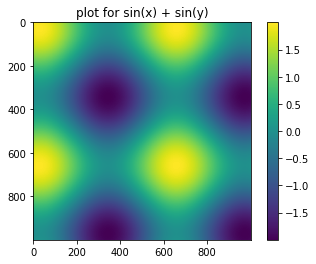

In [42]:
import matplotlib.pyplot as plt

# Return a meshgrid based on two vectors.

# it generates a len(x) times len(y) matrix.
# This allows you to store the values needed to compare every value of x with every value of y.
# If you input the same vector twice, dy is the transpose of dx
dx, dy = np.meshgrid(points, points)

z = (np.sin(dx) + np.sin(dy))
plt.imshow(z)
plt.colorbar()
plt.title('plot for sin(x) + sin(y)')

#### Numpy Where

In [43]:
# Numpy Where

A = np.array([1, 2, 3, 4])
B = np.array([100, 200, 300, 400])

condition = np.array([True, True, False, False])

print(A[condition])
print(B[condition])

[1 2]
[100 200]


In [44]:
# Where my condition is met, choose A, else choose B
answer = [(A_val if cond else B_val) for A_val, B_val, cond in zip(A, B, condition)]
print(answer)

[1, 2, 300, 400]


In [45]:
# Where my condition is met, choose A, else choose B
answer2 = np.where(condition, A, B)
print(answer2)

[  1   2 300 400]


#### Numpy Any & All

In [47]:
bool_arr = np.array([True, False, True, True])
# There exist quite useful functions for a concept we call Masking.

In [48]:
# If any value is true, return true (else false)
bool_arr.any()

True

In [49]:
# If all values are true, return true (else false)
bool_arr.all()

False

#### Numpy Unique and `in` checking

In [50]:
# Sometimes you just want to know all the unique values in a numpy array, luckily that function was already implemented for you
letters = ['A', 'B', 'C', 'D', 'D', 'A', 'E', 'F', 'G', 'H', 'Z']
np.unique(letters)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Z'], dtype='<U1')

In [51]:
# We can also easily check for a big array, if it exists within a 1D vector.
np.in1d(['X', 'C', 'M', 'Z'], letters)

array([False,  True, False,  True])

## Step 2: Practice Numpy


These are optional exercises, but highly recommended to get you familiar with some basic NumPy operations and tricks.

### Array Calculations and Array Indexing
In all exercises below you are not allowed to use a loop in python.

In [56]:
# Given two arrays A and B each of the same size calculate their sum (elementwise) and their product (elementwise).
A = np.arange(5)
B = np.arange(5, 10)

def sum_arrays(A, B):
    # STUDENT
    return np.sum(A + B)

def multiply_arrays(A, B):
    # STUDENT
    return A * B

sum_AB = sum_arrays(A, B)
mult_AB = multiply_arrays(A, B)

sum_AB, mult_AB

(45, array([ 0,  6, 14, 24, 36]))

In [58]:
# Given an array A with shape (128,) calculate the mean of the elements at even indexes.
A = np.arange(128)

def mean_even_idx(A):
    # STUDENT
    return np.mean(A)
    
mean_even_idx(A)

63.5

In [63]:
# Given an array A with shape (N,) make an array with all elements of A in reverse order
# and return as a matrix of size (N, 1).
A = np.arange(6)

def reverse(A):
    # STUDENT
    return np.flip(A).reshape(6, 1)

print(reverse(A))

[[5]
 [4]
 [3]
 [2]
 [1]
 [0]]


#### Two dimensional data arrays
In this course you will be working a lot with matrices and vectors. The following exercises will let you practice with those.

Given is data matrix X with shape (m, n)

In [64]:
m = n = 5
X = np.arange(m * n).reshape(m, n)

X

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [66]:
# Select the j-th column from the matrix X. What happens if you use X[j]? Is this correct?
X[:, 1]
#STUDENT

array([ 1,  6, 11, 16, 21])

In [72]:
# Given a data matrix X with shape (m,n) calculate the vector M of shape (n,),
# where M[i] is the mean of the i-th column of X. Try doing this without using np.mean
M = []
for i in range(n):
    M.append(np.mean(X[:, i]))
#STUDENT


In [9]:
# Now subtract the mean vector you just calculated from all the rows in your matrix leading to the 
# data matrix X_0. Yes this can be done without a loop! Hint: look at array broadcasting.

#STUDENT

array([[-10., -10., -10., -10., -10.],
       [ -5.,  -5.,  -5.,  -5.,  -5.],
       [  0.,   0.,   0.,   0.,   0.],
       [  5.,   5.,   5.,   5.,   5.],
       [ 10.,  10.,  10.,  10.,  10.]])

In [10]:
# Given column j, find the largest element and return the entire row of this element.
# Hint: look at the function np.argmax for this.
np.argmax()
#STUDENT

(array([[0.93273361, 0.66014459, 0.65429675, 0.21709976, 0.2937009 ],
        [0.58236044, 0.47112922, 0.50087206, 0.31108752, 0.95109803],
        [0.93645897, 0.11768906, 0.66942694, 0.46689   , 0.11580459],
        [0.78269239, 0.50548874, 0.11895222, 0.40945852, 0.6280648 ],
        [0.06635387, 0.73355787, 0.13234497, 0.915142  , 0.34592925]]),
 array([0.06635387, 0.73355787, 0.13234497, 0.915142  , 0.34592925]))

#### Linear Algebra

In Python 3, the @ operator is introduced for matrix multiplication. Let A be an array of shape (m, n) and 
let B be an array of shape (n, k) then we can write A @ B for the matrix multiplication of A and B. 

Note that there is conceptual difference between a 1 dimensional array V of size (N,) 
and a vector V as we know it from linear algebra. In linear algebra, a vector with $N$ elements has dimensions $N \times 1$. 
A ‘vector’ V as a numpy array has shape (N,).




In [77]:
# Calculate the inner product of two vector v and w both of shape (N,).
# Validate your result by computing the dot product using multiply and sum operations.
v = np.arange(5)
w = np.arange(5, 10)
print(w.shape)
np.dot(v, w)
#STUDENT

(5,)


80

In [76]:
# Calculate the product of a matrix A of shape (M,N) with a vector v of shape (N,).
np.multiply(w, v)
print(w)
print(v)
np.outer(w, v)
#STUDENT

[5 6 7 8 9]
[0 1 2 3 4]


array([[ 0,  5, 10, 15, 20],
       [ 0,  6, 12, 18, 24],
       [ 0,  7, 14, 21, 28],
       [ 0,  8, 16, 24, 32],
       [ 0,  9, 18, 27, 36]])